<a href="https://colab.research.google.com/github/jadissa09/SMS-Spam-Detect/blob/main/sms-spam-detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
#data cleaning
df=pd.read_csv("/content/sample_data/spam.csv")
df.head()

,Detect,word,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df.drop(columns=['Unnamed: 2','Unnamed: 3',"Unnamed: 4"],inplace=True)
df.head()

,Detect,word
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# New Section

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Detect']=encoder.fit_transform(df['Detect'])

In [16]:
df.head()
df.duplicated().sum()
df=df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [17]:
#EDA
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:

df['nb char']=df['word'].apply(len)
df['nb words']=df['word'].apply(lambda x: len(nltk.word_tokenize(x)))
df['nb sentence']=df['word'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()


,Detect,word,nb char,nb words,nb sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


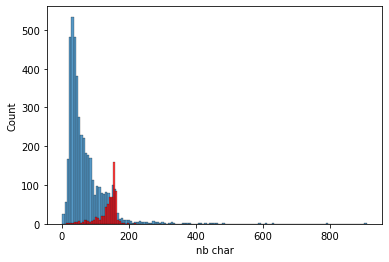

In [21]:
import seaborn as sns

sns.histplot(df[df['Detect']==0]['nb char'])
sns.histplot(df[df['Detect']==1]['nb char'],color='red')

ps=PorterStemmer()

In [22]:
def transform(text):
    txt=text.lower()
    txt=nltk.word_tokenize(text)
    k=[]
    for i in txt:
        if i.isalnum():
            k.append(i)
    
    txt=k[:] 
    k.clear()
    for i in txt :
        if i not in stopwords.words('english') and i not in string.punctuation:
            k.append(i)
    txt=k[:]  
    k.clear()  
    for i in txt:
        k.append(ps.stem(i))
    

    return ' '.join(k)

In [23]:
df['new text']=df['word'].apply(transform)
df.head()

,Detect,word,nb char,nb words,nb sentence,new text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x=tf.fit_transform(df['new text']).toarray()
x.shape
y=df['Detect'].values

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import  GradientBoostingClassifier

lg=LogisticRegression(penalty='l1',solver='liblinear')
svc=SVC(kernel='sigmoid',gamma=1.0)
nv=MultinomialNB()
dt=DecisionTreeClassifier(max_depth=5)
knn=KNeighborsClassifier()
ab=AdaBoostClassifier(n_estimators=50,random_state=2)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
bg=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gr=GradientBoostingClassifier(n_estimators=50,random_state=2)


clfs={
    'svc':svc,
    'nv':nv,
      'dt':dt,
    'lg':lg,
      'knn':knn,
    'ab':ab,
      'rfc':rfc,
    'bg':bg,
      'gr':gr,
    'etc':etc,
}

In [27]:
def train(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    accuracy=accuracy_score(ytest,ypred)
    return accuracy

In [28]:
accuracyscore=[]
for name,model in clfs.items():
    accuracy=train(model,xtrain,xtest,ytrain,ytest)
    accuracyscore.append(accuracy)

In [29]:
perfdf=pd.DataFrame({'algo':clfs.keys(),'accuracy':accuracyscore})
perfdf

,algo,accuracy
0,svc,0.974855
1,nv,0.948743
2,dt,0.935203
3,lg,0.957447
4,knn,0.889749
5,ab,0.964217
6,rfc,0.974855
7,bg,0.957447
8,gr,0.953578
9,etc,0.976789


In [30]:
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
train(etc,xtrain,xtest,ytrain,ytest)

0.97678916827853

In [31]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))